In [2]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import *
from sklearn.metrics import *
from subprocess import call
import graphviz



Total scores
Precision / Recall / F1: 0.9833533674339301 / 0.9825 / 0.9827908236994221

Class scores
Safe:
Precision / Recall / F1: 0.9833533674339301 / 0.9884726224783862 / 0.9913294797687862
Compliant:
Precision / Recall / F1: 0.9833533674339301 / 0.9473684210526315 / 0.9473684210526315
NonCompliant:
Precision / Recall / F1: 0.9833533674339301 / 0.9333333333333333 / 0.8749999999999999


Total scores
Precision / Recall / F1: 0.9873946784922396 / 0.9875 / 0.9873832528180354

Class scores
Safe:
Precision / Recall / F1: 0.9873946784922396 / 0.9942528735632183 / 0.9942528735632183
Compliant:
Precision / Recall / F1: 0.9873946784922396 / 0.975 / 0.962962962962963
NonCompliant:
Precision / Recall / F1: 0.9873946784922396 / 0.8333333333333334 / 0.8695652173913043


Total scores
Precision / Recall / F1: 0.9857059800664452 / 0.9825 / 0.9833873520506468

Class scores
Safe:
Precision / Recall / F1: 0.9857059800664452 / 0.9828080229226361 / 0.9913294797687862
Compliant:
Precision / Recall / F1:

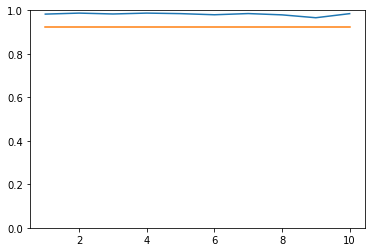

In [2]:
def ten_fold_validation():
    df = pd.read_csv('HW3_Data.txt', delimiter='\t')
    
    # shuffle the data before running 10-fold cross validation
    df = df.sample(frac=1).reset_index(drop=True)

    # Encoding for non-numeric values
    df['Location Type'] = df['Location Type'].map({'Office': 0, 'Warehouse': 1})

    test_size = 400
    start = 0
    

    f1Stats = []
    bestF1 = 0
    
    for i in range(10):
        test = df[start:start+test_size]
        train = df[~df['HeatMiser_ID'].isin(test['HeatMiser_ID'])].dropna()
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(train[['Distance_Feature', 'Speeding_Feature', 'Location Type']], train['OSHA'])
            
        results = clf.predict(test[['Distance_Feature', 'Speeding_Feature', 'Location Type']])
        actual = test['OSHA']
        tups = zip(results, actual)
        right = 0
        for tup in tups:
            if tup[0] == tup[1]:
                right += 1
        
                
        c_mat = confusion_matrix(actual, results, labels=['Safe', 'Compliant', 'NonCompliant'])
        
        print("\n\nTotal scores")
        precisionScore = precision_score(actual, results, average='weighted', labels=['Safe', 'Compliant', 'NonCompliant'])
        recallScore = recall_score(actual, results, average='weighted', labels=['Safe', 'Compliant', 'NonCompliant'])
        f1Score = f1_score(actual, results, average='weighted', labels=['Safe', 'Compliant', 'NonCompliant'])
        print("Precision / Recall / F1: {} / {} / {}".format(precisionScore, recallScore, f1Score))
        
        f1Stats.append(f1Score)
        
        print("\nClass scores")
        for label in ['Safe', 'Compliant', 'NonCompliant']:
            print("{}:".format(label))
            recisionScore = precision_score(actual, results, average='weighted', labels=[label])
            recallScore = recall_score(actual, results, average='weighted', labels=[label])
            f1Score = f1_score(actual, results, average='weighted', labels=[label])
            print("Precision / Recall / F1: {} / {} / {}".format(precisionScore, recallScore, f1Score))
    
        if bestF1 < f1Score:
            bestF1 = f1Score
            bestTree = clf
            
        start += test_size
            
    df_features = df.drop("OSHA", axis=1)
    dot_data = tree.export_graphviz(bestTree, out_file="tree.dot", 
                                    feature_names=['Distance_Feature', 'Speeding_Feature', 'Location Type'],
                                    class_names=['Safe', 'Compliant', 'NonCompliant'], 
                                    filled=True,
                                    special_characters=True)
    
    call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
        
    import matplotlib.pyplot as plt
    
    majorityTruePositive = df[df['OSHA'] == 'Safe'].shape[0]
    majorityFalsePositive = df.shape[0] - majorityTruePositive
    majorityPrecision = majorityTruePositive / (majorityTruePositive + majorityFalsePositive)
    majorityRecall = 1
    majorityF1 = 2 * ((majorityPrecision * majorityRecall) / (majorityPrecision + majorityRecall))
    
    plt.plot([1,2,3,4,5,6,7,8,9,10], f1Stats)
    plt.plot(range(1, 11), [majorityF1] * 10)
    plt.ylim([0,1])
    plt.show()

ten_fold_validation()